In [185]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle
from sklearn.linear_model import LinearRegression



import warnings
warnings.filterwarnings('ignore')

In [186]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv')
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [187]:
data.shape

(8523, 12)

In [188]:
data.describe

<bound method NDFrame.describe of      Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT04

In [189]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [190]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [191]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [192]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [193]:
data['Item_Weight']=data['Item_Weight'].fillna(data.Item_Weight.mean())

In [194]:
data['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [195]:
data['Outlet_Size']=data['Item_Weight'].fillna('Small')

In [196]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

<AxesSubplot:>

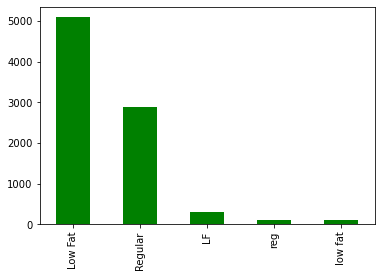

In [197]:
data['Item_Fat_Content'].value_counts().plot(kind='bar',color='green')


<AxesSubplot:>

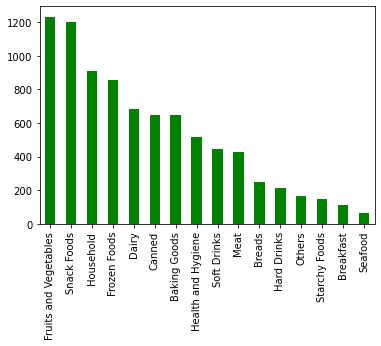

In [198]:
data['Item_Type'].value_counts().plot(kind='bar',color='green')

<AxesSubplot:>

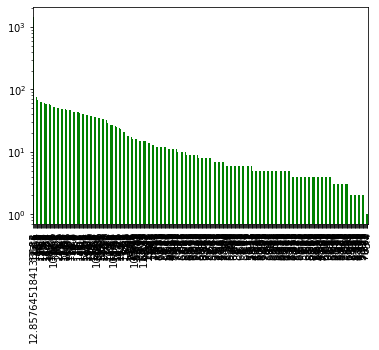

In [199]:
data['Outlet_Size'].value_counts().plot(kind='bar',color='green',logy=True)

<AxesSubplot:>

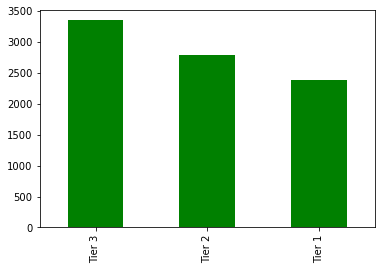

In [200]:
data['Outlet_Location_Type'].value_counts().plot(kind='bar',color='green')

<AxesSubplot:>

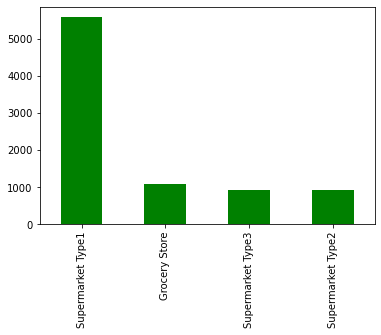

In [201]:
data['Outlet_Type'].value_counts().plot(kind='bar',color='green')

In [202]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
data['Outlet_Size']=LE.fit_transform(data['Outlet_Size'])

data['Item_Type']=LE.fit_transform(data['Item_Type'])
data['Item_Fat_Content']=LE.fit_transform(data['Item_Fat_Content'])
data['Outlet_Location_Type']=LE.fit_transform(data['Outlet_Location_Type'])
data['Outlet_Type']=LE.fit_transform(data['Outlet_Type'])
data['Outlet_Identifier']=LE.fit_transform(data['Outlet_Identifier'])


In [203]:
data=data.drop(['Item_Identifier'],axis=1)
data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,1,0.016047,4,249.8092,9,1999,284,0,1,3735.1380
1,5.920,2,0.019278,14,48.2692,3,2009,57,2,2,443.4228
2,17.500,1,0.016760,10,141.6180,9,1999,376,0,1,2097.2700
3,19.200,2,0.000000,6,182.0950,0,1998,393,2,0,732.3800
4,8.930,1,0.000000,9,53.8614,1,1987,265,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,1,0.056783,13,214.5218,1,1987,125,2,1,2778.3834
8519,8.380,2,0.046982,0,108.1570,7,2002,233,1,1,549.2850
8520,10.600,1,0.035186,8,85.1224,6,2004,299,1,1,1193.1136
8521,7.210,2,0.145221,13,103.1332,3,2009,149,2,2,1845.5976


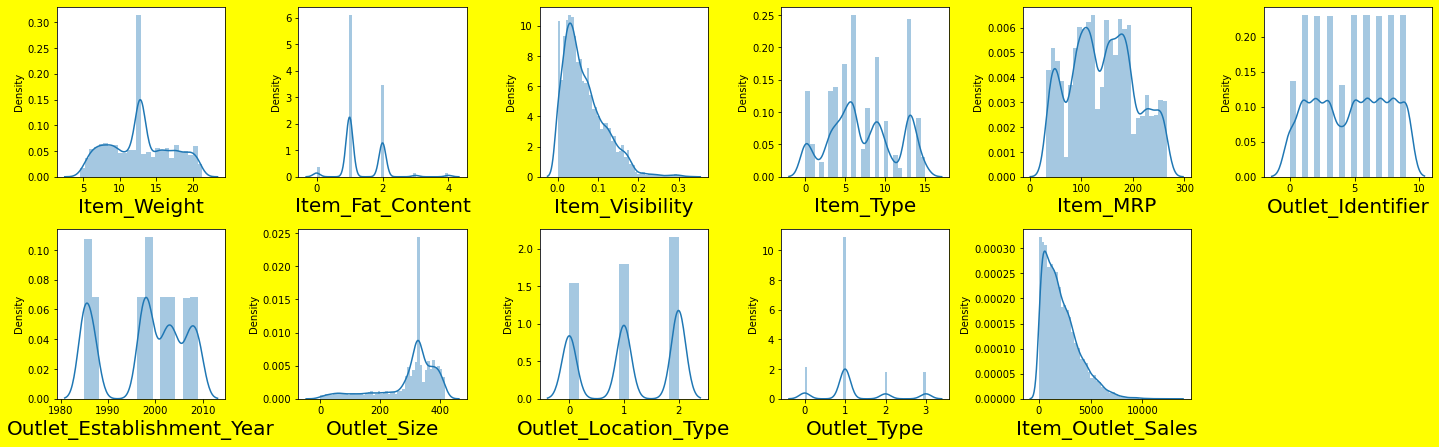

In [204]:
plt.figure(figsize=(20,15),facecolor='yellow')
plotnumber=1
for column in data:
    if plotnumber<=11:
        ax=plt.subplot(5,6,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [205]:
data.corr()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Weight,1.000000,-0.017331,-0.012049,0.028015,0.024756,-0.007975,-0.008301,0.895965,0.004088,-0.000566,0.011550
Item_Fat_Content,-0.017331,1.000000,0.034042,-0.115958,-0.000876,-0.002357,-0.000189,-0.014344,-0.004102,-0.004214,0.009800
Item_Visibility,-0.012049,0.034042,1.000000,-0.035249,-0.001315,-0.100439,-0.074834,-0.001150,-0.028099,-0.173468,-0.128625
Item_Type,0.028015,-0.115958,-0.035249,1.000000,0.032651,0.001656,0.004970,0.033651,0.003084,0.003053,0.017048
Item_MRP,0.024756,-0.000876,-0.001315,0.032651,1.000000,0.003319,0.005020,0.020708,0.000232,-0.001975,0.567574
Outlet_Identifier,-0.007975,-0.002357,-0.100439,0.001656,0.003319,1.000000,0.079035,-0.009742,-0.716176,0.099873,0.162325
Outlet_Establishment_Year,-0.008301,-0.000189,-0.074834,0.004970,0.005020,0.079035,1.000000,-0.096910,-0.089216,-0.122304,-0.049135
Outlet_Size,0.895965,-0.014344,-0.001150,0.033651,0.020708,-0.009742,-0.096910,1.000000,0.015726,0.051108,0.022099
Outlet_Location_Type,0.004088,-0.004102,-0.028099,0.003084,0.000232,-0.716176,-0.089216,0.015726,1.000000,0.467219,0.089367
Outlet_Type,-0.000566,-0.004214,-0.173468,0.003053,-0.001975,0.099873,-0.122304,0.051108,0.467219,1.000000,0.401522


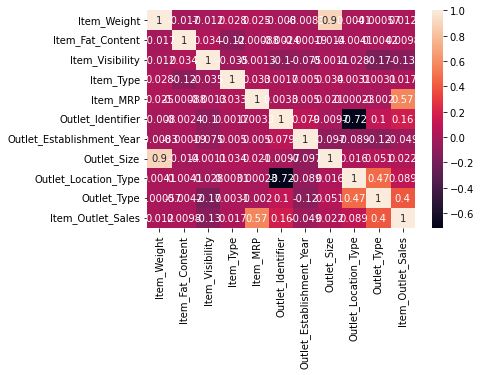

In [206]:
sns.heatmap(data.corr(),annot=True,annot_kws={'size':10})
plt.show()

In [207]:
from sklearn.preprocessing import power_transform

In [208]:
X=data.drop('Item_Outlet_Sales',axis=1)
y=data['Item_Outlet_Sales']

In [209]:
X

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.300,1,0.016047,4,249.8092,9,1999,284,0,1
1,5.920,2,0.019278,14,48.2692,3,2009,57,2,2
2,17.500,1,0.016760,10,141.6180,9,1999,376,0,1
3,19.200,2,0.000000,6,182.0950,0,1998,393,2,0
4,8.930,1,0.000000,9,53.8614,1,1987,265,2,1
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,1,0.056783,13,214.5218,1,1987,125,2,1
8519,8.380,2,0.046982,0,108.1570,7,2002,233,1,1
8520,10.600,1,0.035186,8,85.1224,6,2004,299,1,1
8521,7.210,2,0.145221,13,103.1332,3,2009,149,2,2


In [210]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [211]:
X.skew().sort_values(ascending = False)

Item_Visibility              1.167091
Item_Fat_Content             0.994824
Outlet_Type                  0.927438
Item_MRP                     0.127202
Item_Type                    0.101655
Item_Weight                  0.090561
Outlet_Identifier           -0.059861
Outlet_Location_Type        -0.209093
Outlet_Establishment_Year   -0.396641
Outlet_Size                 -1.425559
dtype: float64

In [212]:
X_new = power_transform(X)

In [213]:
pd.DataFrame(X_new, columns = X.columns).skew().sort_values(ascending = False)

Item_Visibility              0.124279
Item_Fat_Content             0.032643
Outlet_Type                  0.007863
Item_Weight                 -0.068024
Item_MRP                    -0.115386
Item_Type                   -0.164574
Outlet_Establishment_Year   -0.200959
Outlet_Identifier           -0.213935
Outlet_Location_Type        -0.220632
Outlet_Size                 -0.634361
dtype: float64

In [214]:
X = pd.DataFrame(X_new, columns = X.columns)

In [215]:
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,-0.822636,-0.520977,-1.146886,-0.712347,1.623670,1.427394,0.048562,-0.408223,-1.373843,-0.123488
1,-1.733801,1.009871,-1.037100,1.504660,-1.595016,-0.548577,1.461925,-2.070433,1.088324,1.040591
2,1.086362,-0.520977,-1.122375,0.684390,0.081237,1.427394,0.048562,0.959518,-1.373843,-0.123488
3,1.447728,1.009871,-1.745551,-0.215420,0.689968,-1.809119,-0.075796,1.257731,1.088324,-1.915952
4,-0.917588,-0.520977,-1.745551,0.468410,-1.476078,-1.343810,-1.270835,-0.639516,1.088324,-0.123488


In [216]:
X.skew()[np.abs(X.skew())<0.20].all()

True

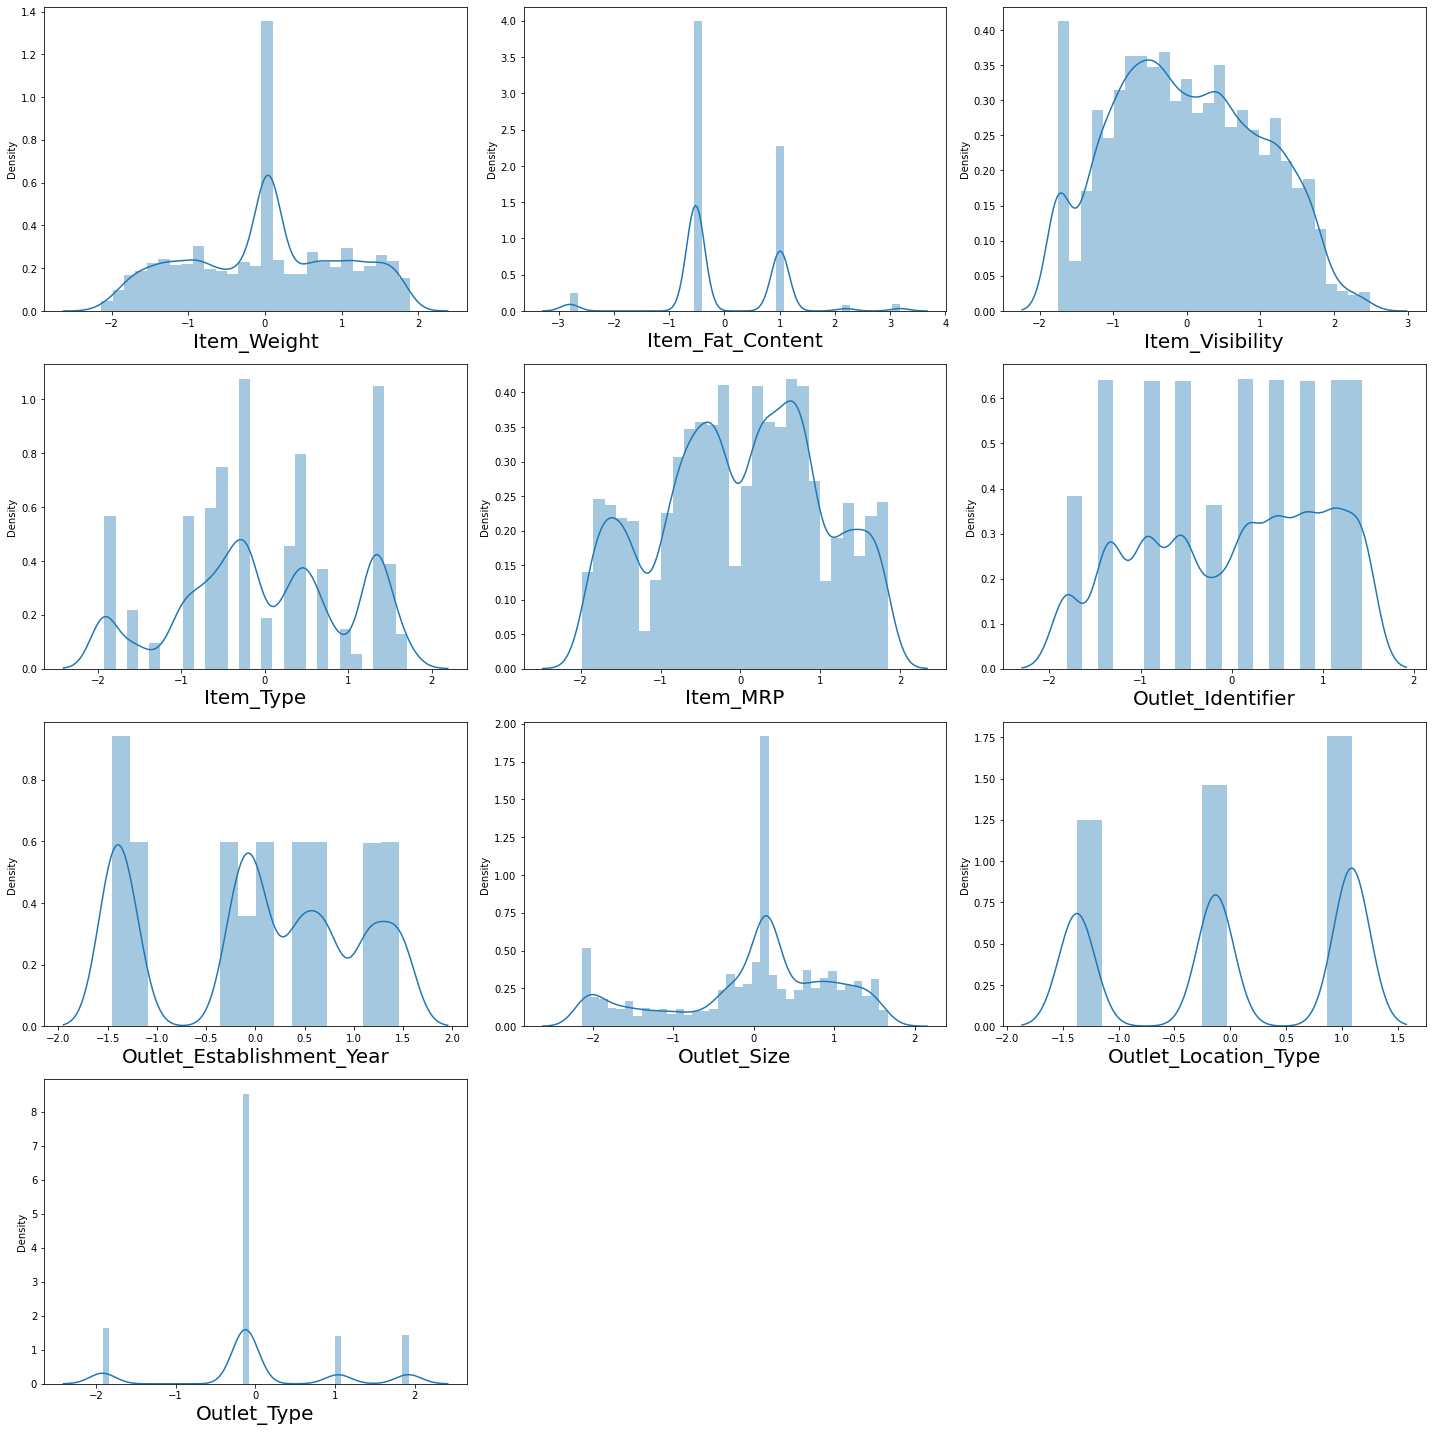

In [217]:
plt.figure(figsize = (20,20))
plotnumber = 1

for column in X:
    if plotnumber <= 12:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(X[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber +=1
plt.tight_layout()

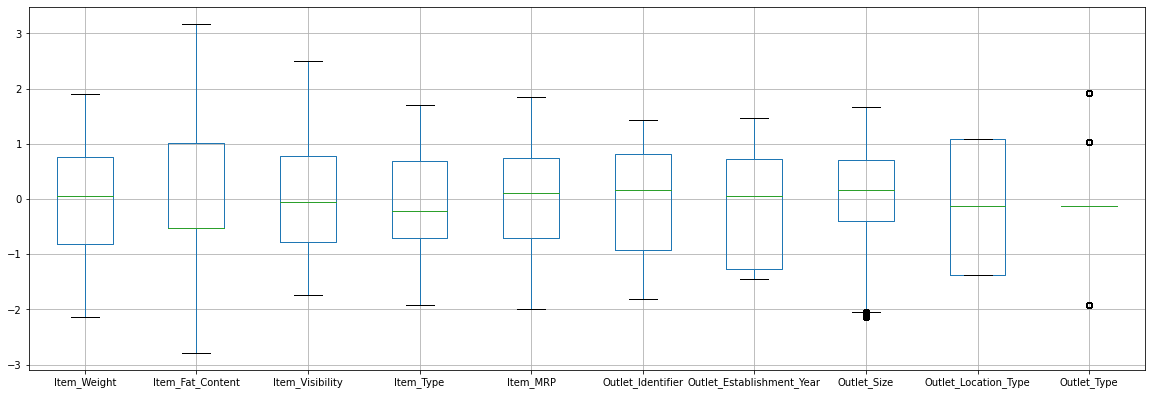

In [218]:
X.iloc[:,:].boxplot(figsize = (20,8))
plt.subplots_adjust(bottom=0.25)
plt.show()

In [219]:
from scipy.stats import zscore
(np.abs(zscore(X))<3).all()

Item_Weight                   True
Item_Fat_Content             False
Item_Visibility               True
Item_Type                     True
Item_MRP                      True
Outlet_Identifier             True
Outlet_Establishment_Year     True
Outlet_Size                   True
Outlet_Location_Type          True
Outlet_Type                   True
dtype: bool

In [220]:
(np.abs(zscore(X))>-3).all()

Item_Weight                  True
Item_Fat_Content             True
Item_Visibility              True
Item_Type                    True
Item_MRP                     True
Outlet_Identifier            True
Outlet_Establishment_Year    True
Outlet_Size                  True
Outlet_Location_Type         True
Outlet_Type                  True
dtype: bool

In [221]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)


In [222]:
max_r2_score = 0
maxRS = 0

for i in range(1,397):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state = i)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    y_pred = LR.predict(x_test)
    r2_score = LR.score(x_test,y_test)
    print('r2_score', r2_score*100,'%', 'random_state', i)
    
    if r2_score > max_r2_score:
        max_r2_score = r2_score
        maxRS = i
        print('r2_score', max_r2_score*100,'%', 'random_state', i)

r2_score 51.74997821860124 % random_state 1
r2_score 51.74997821860124 % random_state 1
r2_score 52.58637907051281 % random_state 2
r2_score 52.58637907051281 % random_state 2
r2_score 54.58032716506042 % random_state 3
r2_score 54.58032716506042 % random_state 3
r2_score 51.14371913351945 % random_state 4
r2_score 52.25751115522168 % random_state 5
r2_score 51.84242717523062 % random_state 6
r2_score 49.99757032555697 % random_state 7
r2_score 52.51947436080104 % random_state 8
r2_score 51.739319444222964 % random_state 9
r2_score 51.3206467781949 % random_state 10
r2_score 50.010567686351884 % random_state 11
r2_score 52.381542405107865 % random_state 12
r2_score 51.99486424775822 % random_state 13
r2_score 52.17303542410613 % random_state 14
r2_score 52.94169866320245 % random_state 15
r2_score 51.89564012213859 % random_state 16
r2_score 52.83659559734984 % random_state 17
r2_score 50.97787340828132 % random_state 18
r2_score 51.705071062643505 % random_state 19
r2_score 52.8463719

r2_score 52.42914103595273 % random_state 180
r2_score 52.02240344647275 % random_state 181
r2_score 49.27819857940116 % random_state 182
r2_score 49.743462573577645 % random_state 183
r2_score 52.583029154922045 % random_state 184
r2_score 53.00452283671117 % random_state 185
r2_score 53.72559551551912 % random_state 186
r2_score 52.51478753448953 % random_state 187
r2_score 51.60146900092823 % random_state 188
r2_score 51.97141384541533 % random_state 189
r2_score 50.638089992343936 % random_state 190
r2_score 51.62380629831582 % random_state 191
r2_score 50.5769411926534 % random_state 192
r2_score 53.762218964050945 % random_state 193
r2_score 54.04879497459252 % random_state 194
r2_score 52.4555843010741 % random_state 195
r2_score 52.37692028479577 % random_state 196
r2_score 53.53923366441907 % random_state 197
r2_score 51.39319125356886 % random_state 198
r2_score 53.65175726400923 % random_state 199
r2_score 53.19290232056206 % random_state 200
r2_score 51.7700577126913 % rand

r2_score 52.31659550335668 % random_state 357
r2_score 49.97488394044305 % random_state 358
r2_score 51.24710927856364 % random_state 359
r2_score 52.16040843951082 % random_state 360
r2_score 52.65420325825716 % random_state 361
r2_score 54.23343178415998 % random_state 362
r2_score 52.372159588549664 % random_state 363
r2_score 52.118694337087355 % random_state 364
r2_score 51.90117294097072 % random_state 365
r2_score 51.44731046179769 % random_state 366
r2_score 52.37627446116808 % random_state 367
r2_score 52.827821760819525 % random_state 368
r2_score 51.31416509148039 % random_state 369
r2_score 52.89093699767733 % random_state 370
r2_score 53.39744790635108 % random_state 371
r2_score 52.977626709317086 % random_state 372
r2_score 50.98572478999681 % random_state 373
r2_score 51.382014674433194 % random_state 374
r2_score 49.84349788165075 % random_state 375
r2_score 51.337475152592724 % random_state 376
r2_score 53.14010945054029 % random_state 377
r2_score 51.589899334995934 

In [223]:
print('best accuracy',max_r2_score,'best random state',maxRS)

best accuracy 0.550799209024464 best random state 247


In [224]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=.25,random_state=247)

In [225]:
lif=LinearRegression()
lif.fit(x_train,y_train)

LinearRegression()

In [226]:
lif.score(x_train,y_train)

0.5107066566245178

In [227]:
lif.score(x_test,y_test)

0.550799209024464

In [228]:
y_pred=lif.predict(x_test)
y_pred

array([ 452.81611095, 1982.8722812 , 4280.38746744, ..., 2377.73794061,
       -206.9447875 , 3869.22284815])

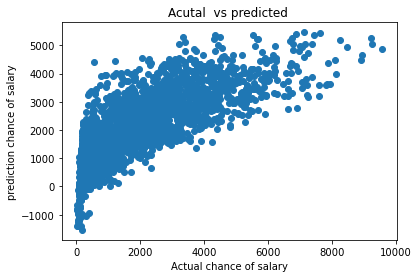

In [229]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual chance of salary')
plt.ylabel('prediction chance of salary')
plt.title('Acutal  vs predicted ')
plt.show()

In [230]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [231]:
y_pred=lif.predict(x_test)

In [232]:
mean_absolute_error(y_test,y_pred)

857.7652878089365

In [233]:
mean_squared_error(y_test,y_pred)

1280801.604588015

In [234]:
np.sqrt(mean_squared_error(y_test,y_pred))

1131.7250569763025

In [238]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print('R2 Score: ', knn.score(x_test, y_test))

print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))


R2 Score:  0.541407753158754
Mean Squared Error:  1307579.3663014264


In [239]:
from sklearn.ensemble import RandomForestRegressor
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

print('R2 Score: ', rf.score(x_test, y_test))

print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))

R2 Score:  0.5629772471035039
Mean Squared Error:  1246078.4896119824


In [243]:
from sklearn import svm
regr = svm.SVR()

regr.fit(x_train, y_train)

y_pred = regr.predict(x_test)

print('R2 Score: ', regr.score(x_test, y_test))

print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))

R2 Score:  0.05502883619301768
Mean Squared Error:  2694386.579918784


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

param_grid = {'n_estimators': np.arange(10,100,10),
         'max_depth': np.arange(1,21,5),
         'min_samples_split': np.arange(2,21,5),
         'min_samples_leaf': np.arange(1,11,2)}

grd = GridSearchCV(rf, param_grid = param_grid)
grd.fit(x_train, y_train)

print('Best Param ==>', grd.best_params_)

rf = grd.best_estimator_

rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)


print('R2 Score: ', rf.score(x_test, y_test))

print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))